In [1]:
import pandas as pd

#docs = pd.read_excel('SMSSpamCollection.xls',header=None,names=['Class', 'SMS']) 
docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])

#classifier in column 1, sms in column 2.
docs.head()


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# counting spam and ham instances
# df.column_name.value_counts() - gives no. of unique inputs in the columns

ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [3]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

('Spam % is ', 13.406317300789663)


In [4]:
# mapping labels to 0 and 1
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [5]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=docs.sms
y=docs.label

In [7]:
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [8]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_train.head()


710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [10]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [11]:
dic=vect.fit(X_train)
# X_train_dtm = vect.transform(X_train)

In [12]:
# printing the vocabulary
vect.vocabulary_

X_train_vocabs_dict = dic.get_feature_names()
len(X_train_vocabs_dict)


7204

In [13]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed =vect.transform(X_test)

In [14]:
# note that the type is transformed matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


In [15]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba =mnb.predict_proba(X_test_transformed)


# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9877961234745154

In [16]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1201,    7],
       [  10,  175]])

In [18]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1201    7]
 [  10  175]]


In [19]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

('sensitivity', 0.9459459459459459)


In [20]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

('specificity', 0.9942052980132451)


In [21]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

('precision', 0.9615384615384616)
0.9615384615384616


In [22]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

('precision', 0.9615384615384616)
('PRECISION SCORE :', 0.9615384615384616)
('RECALL SCORE :', 0.9459459459459459)
('F1 SCORE :', 0.9536784741144414)


In [23]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0])

In [24]:
y_pred_proba

array([[9.95239557e-01, 4.76044325e-03],
       [9.99852357e-01, 1.47642544e-04],
       [9.27878579e-01, 7.21214213e-02],
       ...,
       [9.99999671e-01, 3.28799076e-07],
       [3.72703622e-09, 9.99999996e-01],
       [9.99999985e-01, 1.46852511e-08]])

In [25]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [26]:
# area under the curve
print (roc_auc)

0.9921872203329157


In [27]:
print(true_positive_rate)

[0.30810811 0.31351351 0.33513514 0.34054054 0.35135135 0.36756757
 0.4        0.41081081 0.59459459 0.60540541 0.61621622 0.62702703
 0.67567568 0.68648649 0.71891892 0.72972973 0.94594595 0.94594595
 0.94594595 0.94594595 0.95135135 0.95135135 0.96756757 0.96756757
 0.96756757 0.96756757 0.96756757 0.96756757 0.96756757 0.96756757
 0.96756757 0.96756757 0.96756757 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.98378378 0.98378378 0.98378378 0.98378378 0.98918919
 0.98918919 0.98918919 0.98918919 0.99459459 0.99459459 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     

In [28]:
print(false_positive_rate)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00165563
 0.00331126 0.0115894  0.0115894  0.01324503 0.01324503 0.02235099
 0.02400662 0.0281457  0.03890728 0.04470199 0.04635762 0.04966887
 0.05711921 0.06043046 0.06125828 0.06125828 0.06374172 0.06870861
 0.07036424 0.0736755  0.07533113 0.08360927 0.08857616 0.09519868
 0.0968543  0.10099338 0.10264901 0.11672185 0.11837748 0.12665563
 0.12831126 0.13162252 0.13327815 0.14072848 0.14238411 0.14652318
 0.1531457  0.1531457  0.1589404  0.16059603 0.16307947 0.1647351
 0.20943709 0.21109272 0.22930464 0.23096026 0.23592715 0.2384106
 0.26655629 0.26655629 0.27400662 0.27566225 0.29304636 0.29304636
 0.30215232 0.30380795 0.30711921 0.30711921 0.31291391 0.31291391
 0.32036424 0.32201987 0.37086093 0.37251656 0.38493377 0.3865894
 0.43708609 0.43956954 0.46854305 0.47019868 0.59271523 0.59437086
 0.64403974 0.

In [29]:
print(thresholds)

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999996e-01 9.99999996e-01 9.99999995e-01 9.99999994e-01
 9.99999891e-01 9.99999451e-01 9.99998530e-01 9.99997944e-01
 8.23259521e-01 6.03514139e-01 5.57484017e-01 2.93007628e-01
 2.83243254e-01 2.56756624e-01 2.53425148e-01 1.34568519e-01
 1.34539652e-01 1.34510790e-01 1.34481933e-01 1.01551419e-01
 9.39254835e-02 9.38832989e-02 7.38341494e-02 7.21048341e-02
 7.10172010e-02 7.04886074e-02 6.89078701e-02 6.08617913e-02
 6.02739339e-02 5.85415571e-02 5.85278961e-02 4.92769211e-02
 4.92536993e-02 3.98139183e-02 3.97949694e-02 3.74097322e-02
 3.74097322e-02 2.88222872e-02 2.87588101e-02 2.52608490e-02
 2.52547459e-02 2.25172886e-02 2.17200381e-02 1.91483675e-02
 1.90614072e-02 1.90567726e-02 1.65820422e-02 1.63327142e-02
 1.53112191e-02 1.53037461e-02 1.47786698e-02 1.45856255e-02
 7.97660888e-03 7.90702710e-03 6.19870579e-03 6.17975072e-03
 5.62111311e-03 5.594441

In [30]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,FPR,TPR,Threshold
0,0.000000,0.308108,1.000000e+00
1,0.000000,0.313514,1.000000e+00
2,0.000000,0.335135,1.000000e+00
3,0.000000,0.340541,1.000000e+00
4,0.000000,0.351351,1.000000e+00
5,0.000000,0.367568,1.000000e+00
6,0.000000,0.400000,1.000000e+00
7,0.000000,0.410811,1.000000e+00
8,0.000000,0.594595,1.000000e+00
9,0.000000,0.605405,1.000000e+00


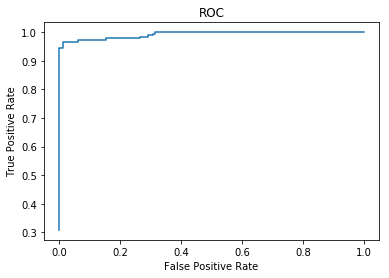

In [31]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)